### 데이터 : 서울시 구별 CCTV 대수 + 서울시 구별 인구수(전체,한국인,외국인,65세이상고령자)

### 목적 : 데이터 분석

In [1]:
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 폰트 설치후 반드시 재시작!!!


In [2]:
# matplotlib 나눔바른고딕체로 폰트 변경하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
# 데이터 파일을 가져오기 위해 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# CCTV csv파일 가져오기
csvPath='/content/drive/MyDrive/DataScience/data/01. CCTV_in_Seoul.csv'
xlsxPath='/content/drive/MyDrive/DataScience/data/01. population_in_Seoul.xls'

import pandas as pd
import numpy as np

cctv_seoul=pd.read_csv(csvPath,encoding='utf-8')

# info(),describe(),head(),tail()
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [36]:
cctv_seoul.tail()

,구별,소계,최근증가율
20,용산구,1624,53.216374
21,은평구,1873,85.237258
22,종로구,1002,248.922414
23,중구,671,147.699758
24,중랑구,660,79.960707


In [6]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [7]:
# cctv_seoul의 수치형 데이터 int64, float64인 컬럼 데이터의 통계치를 보여준다.
cctv_seoul.describe()

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1179.080000,764.760000,159.480000,205.200000,385.880000
std,556.728983,415.510257,104.132976,137.877059,182.479981
min,485.000000,238.000000,21.000000,30.000000,81.000000
25%,748.000000,464.000000,78.000000,103.000000,292.000000
50%,1015.000000,573.000000,142.000000,184.000000,377.000000
75%,1496.000000,1070.000000,218.000000,269.000000,467.000000
max,2780.000000,1843.000000,430.000000,584.000000,932.000000


In [8]:
# 컬럼명 '기관명' -> '구별'
cctv_seoul.rename(columns={'기관명':'구별'},inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [9]:
cctv_seoul['최근증가율']=(cctv_seoul['2016년']+cctv_seoul['2015년']+cctv_seoul['2014년'])/cctv_seoul['2013년도 이전']*100
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [10]:
# 데이터에 질문을 던지자!
# 가장 CCTV대수가 많은 구는 어디? 적은 구는 어디?
# 소계를 기준으로 가장 많은 구 5개, 적은 구 5개 -> 정렬
cctv_seoul.sort_values(by='소계',ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
18,양천구,2034,1843,142,30,467,34.671731
14,서초구,1930,1406,157,336,398,63.371266
21,은평구,1873,1138,224,278,468,85.237258
20,용산구,1624,1368,218,112,398,53.216374


In [11]:
cctv_seoul.sort_values(by='소계',ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
17,송파구,618,529,21,68,463,104.347826
24,중랑구,660,509,121,177,109,79.960707
23,중구,671,413,190,72,348,147.699758


In [12]:
# 질문 : 최근 증가율 가장 높은 5구, 가장 적은 5구
cctv_seoul.sort_values(by='최근증가율',ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [13]:
cctv_seoul.sort_values(by='최근증가율',ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2034,1843,142,30,467,34.671731
13,서대문구,962,844,50,68,292,48.578199
20,용산구,1624,1368,218,112,398,53.216374
5,광진구,707,573,78,53,174,53.228621
14,서초구,1930,1406,157,336,398,63.371266


In [14]:
# cctv_seoul에서 '2013년도 이전', '2014년', '2015년', '2016년' 컬럼을 삭제
cctv_seoul.drop(['2013년도 이전','2014년','2015년','2016년'],axis=1,inplace=True)
cctv_seoul.head()

,구별,소계,최근증가율
0,강남구,2780,150.619195
1,강동구,773,166.490765
2,강북구,748,125.203252
3,강서구,884,134.793814
4,관악구,1496,149.290780


In [15]:
cctv_seoul.tail()

,구별,소계,최근증가율
20,용산구,1624,53.216374
21,은평구,1873,85.237258
22,종로구,1002,248.922414
23,중구,671,147.699758
24,중랑구,660,79.960707


In [16]:
# usecols를 알기 위해서는 먼저 excel파일의 내용을 눈으로 확인한 후에 선택한다.
pop_seoul=pd.read_excel(xlsxPath,header=2,usecols='B,D,G,J,N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [17]:
pop_seoul.tail()

,자치구,계,계.1,계.2,65세이상고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [18]:
pop_seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

In [19]:
# 컬럼명 변경하기
pop_seoul.columns = ['구별', '인구', '한국인', '외국인', '고령자']
pop_seoul.head()

,구별,인구,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [20]:
# 불필요한 행[0,26]을 삭제하기
pop_seoul.drop([0,26],inplace=True)
pop_seoul

,구별,인구,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [21]:
# index 번호를 0~24로 변경
pop_seoul.reset_index(drop=True,inplace=True)
pop_seoul

,구별,인구,한국인,외국인,고령자
0,종로구,162820.0,153589.0,9231.0,25425.0
1,중구,133240.0,124312.0,8928.0,20764.0
2,용산구,244203.0,229456.0,14747.0,36231.0
3,성동구,311244.0,303380.0,7864.0,39997.0
4,광진구,372164.0,357211.0,14953.0,42214.0
5,동대문구,369496.0,354079.0,15417.0,54173.0
6,중랑구,414503.0,409882.0,4621.0,56774.0
7,성북구,461260.0,449773.0,11487.0,64692.0
8,강북구,330192.0,326686.0,3506.0,54813.0
9,도봉구,348646.0,346629.0,2017.0,51312.0


In [22]:
# cctv_seoul, pop_seoul 데이터프레임 합치기
data_result=pd.merge(pop_seoul,cctv_seoul,on='구별')
data_result.head()

,구별,인구,한국인,외국인,고령자,소계,최근증가율
0,종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414
1,중구,133240.0,124312.0,8928.0,20764.0,671,147.699758
2,용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374
3,성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822
4,광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621


In [23]:
# 고령자의 비율
data_result['고령자비율']=data_result['고령자']/data_result['인구']*100

In [24]:
# 외국인의 비율
data_result['외국인비율']=data_result['외국인']/data_result['인구']*100

In [25]:
data_result.head()

,구별,인구,한국인,외국인,고령자,소계,최근증가율,고령자비율,외국인비율
0,종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414,15.615404,5.669451
1,중구,133240.0,124312.0,8928.0,20764.0,671,147.699758,15.583909,6.700690
2,용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828
3,성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822,12.850689,2.526635
4,광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621,11.342849,4.017852


In [26]:
# 컬럼명 다시 변경
data_result.columns=['구별','인구','한국인','외국인','고령자','CCTV대수','CCTV증가율','고령자비율','외국인비율']
data_result.head()

,구별,인구,한국인,외국인,고령자,CCTV대수,CCTV증가율,고령자비율,외국인비율
0,종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414,15.615404,5.669451
1,중구,133240.0,124312.0,8928.0,20764.0,671,147.699758,15.583909,6.700690
2,용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828
3,성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822,12.850689,2.526635
4,광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621,11.342849,4.017852


In [28]:
# matplotlib으로 그래프를 그리기 위해서는 index를 '구별'로 변경
data_result.set_index('구별',inplace=True)
data_result.head()

,인구,한국인,외국인,고령자,CCTV대수,CCTV증가율,고령자비율,외국인비율
구별,,,,,,,,
종로구,162820.0,153589.0,9231.0,25425.0,1002,248.922414,15.615404,5.669451
중구,133240.0,124312.0,8928.0,20764.0,671,147.699758,15.583909,6.700690
용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828
성동구,311244.0,303380.0,7864.0,39997.0,1062,81.780822,12.850689,2.526635
광진구,372164.0,357211.0,14953.0,42214.0,707,53.228621,11.342849,4.017852


### matplotlib의 CheetSheet
https://matplotlib.org/cheatsheets/

<Axes: ylabel='구별'>

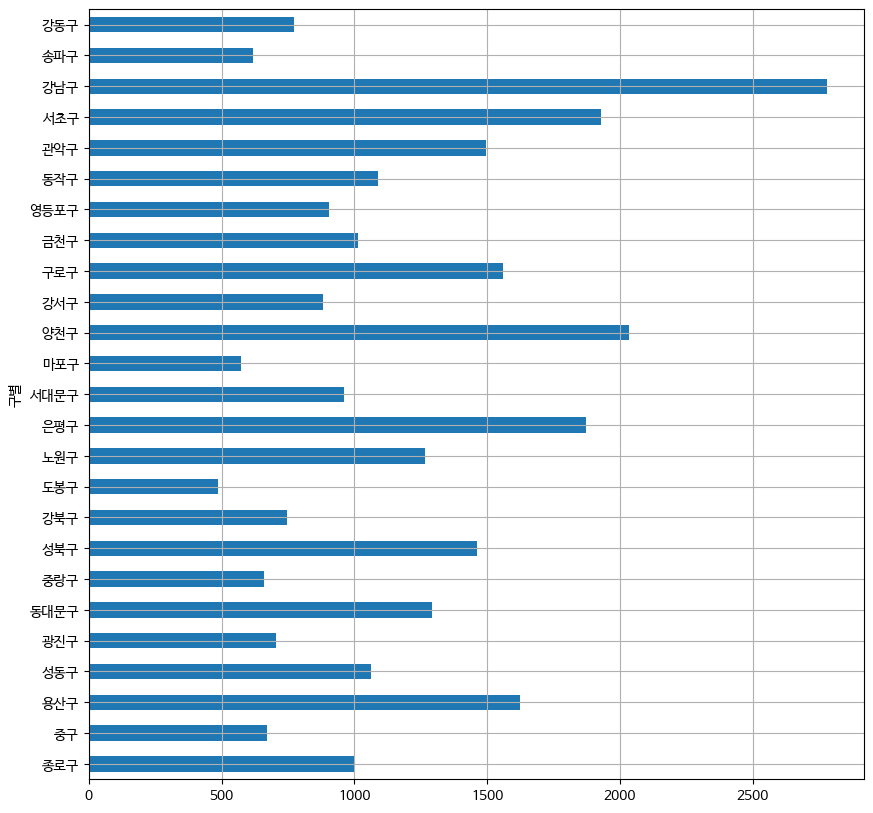

In [29]:
# data_result['소계']를 barh형태로 plot하자
data_result['CCTV대수'].plot(kind='barh',grid=True,figsize=(10,10))

<Axes: ylabel='구별'>

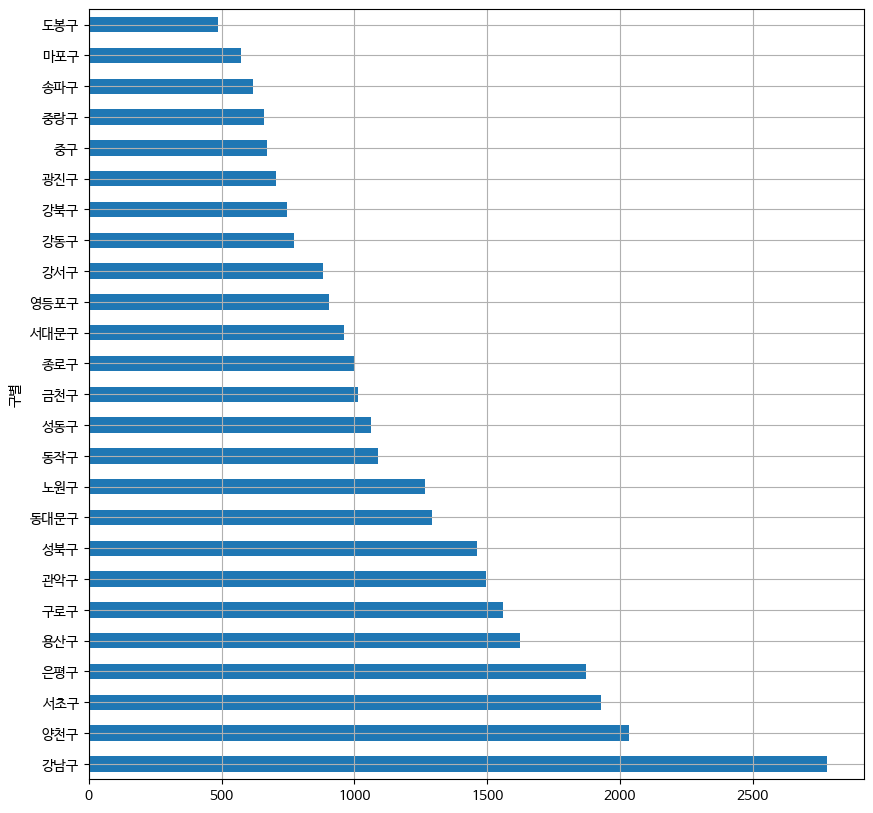

In [37]:
# matplotlib으로 'CCTV대수'를 기준으로 가장 많은 구부터 출력
# sort_values를 data_result에 저장하고, 다음 줄에서 plot
data_result.sort_values(by='CCTV대수',ascending=False,inplace=True)
data_result['CCTV대수'].plot(kind='barh',grid=True,figsize=(10,10))

<Axes: xlabel='구별'>

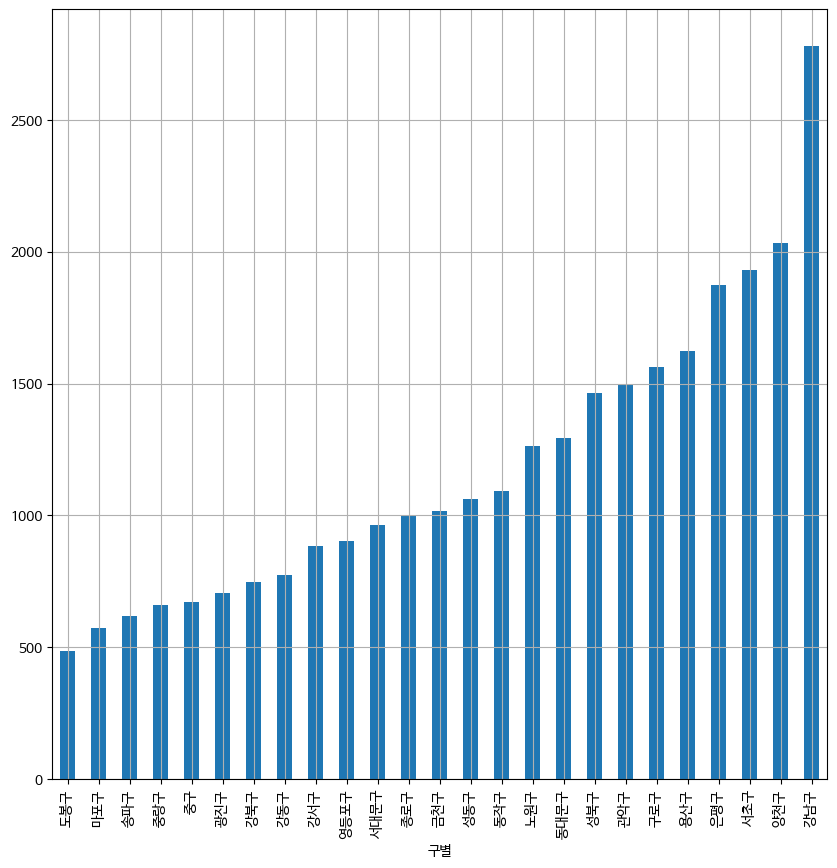

In [35]:
data_result['CCTV대수'].sort_values(ascending=True).plot(kind='bar',grid=True,figsize=(10,10))

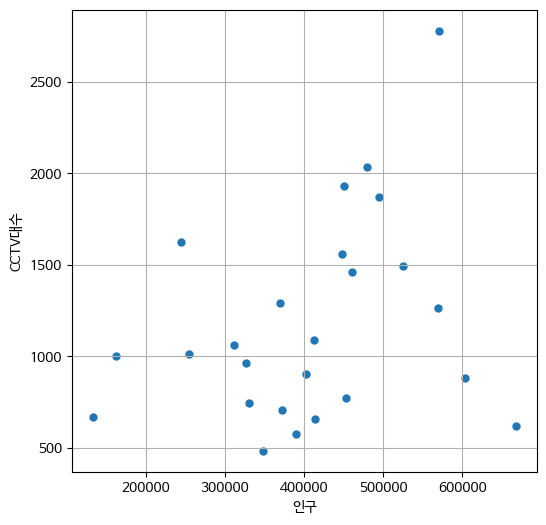

In [40]:
# matplotlib으로 가로축은 '인구', 세로축은 'CCTV대수'인 scatter 그래프를 출력
plt.figure(figsize=(6,6))
# 산점도(x,y,s) s는 점의 크기
plt.scatter(data_result['인구'], data_result['CCTV대수'], s=25)
plt.xlabel('인구')
plt.ylabel('CCTV대수')
plt.grid()
plt.show()

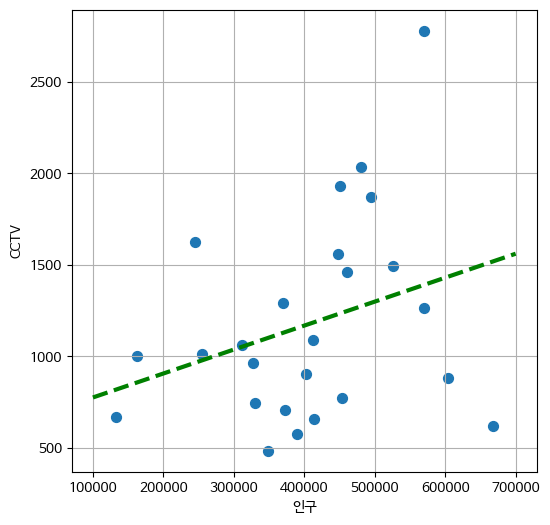

In [43]:
# x,y 데이터를 받아들여서 1차함수를 생성(직선의 방정식)
fp1 = np.polyfit(data_result['인구'], data_result['CCTV대수'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구'], data_result['CCTV대수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [47]:
data_result['오차'] = np.abs(data_result['CCTV대수'] - f1(data_result['인구']))
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,인구,한국인,외국인,고령자,CCTV대수,CCTV증가율,고령자비율,외국인비율,오차
구별,,,,,,,,,
강남구,570500.0,565550.0,4950.0,63167.0,2780,150.619195,11.072217,0.867660,1388.055355
송파구,667483.0,660584.0,6899.0,72506.0,618,104.347826,10.862599,1.033584,900.911312
양천구,479978.0,475949.0,4029.0,52975.0,2034,34.671731,11.036964,0.839413,760.563512
서초구,450310.0,445994.0,4316.0,51733.0,1930,63.371266,11.488308,0.958451,695.403794
용산구,244203.0,229456.0,14747.0,36231.0,1624,53.216374,14.836427,6.038828,659.231690


<ipython-input-60-804bbf4dec7e>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_sort['인구'][n]+7500, df_sort['CCTV대수'][n]-25,


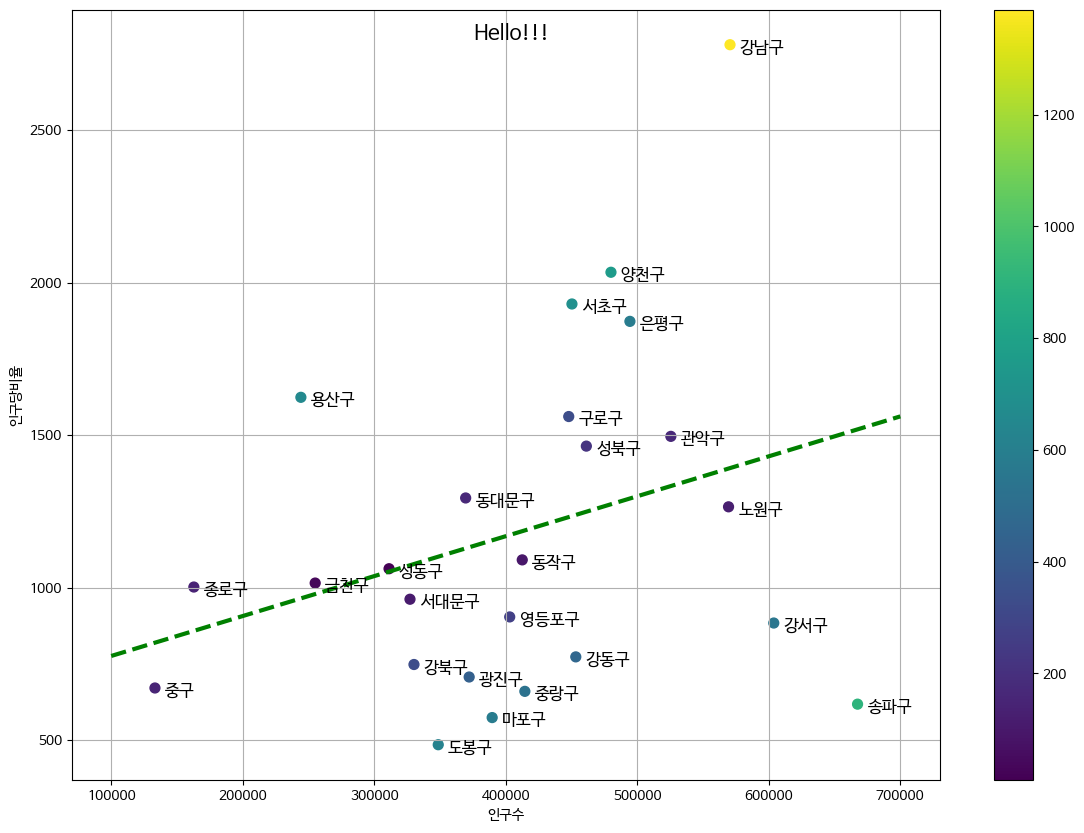

In [60]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구'], data_result['CCTV대수'],
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    # text를 출력할 x좌표의 시작점, y좌표의 시작점, 찍을 내용
    plt.text(df_sort['인구'][n]+7500, df_sort['CCTV대수'][n]-25,
             df_sort.index[n], fontsize=12)

temp = "Hello!!!"
plt.text(400000-25000, 2800, temp, fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()